<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Modules</p>

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import  f1_score, precision_score, recall_score, classification_report,r2_score
from sklearn import model_selection
import warnings
from imblearn.over_sampling import SMOTE
import tracemalloc 
import time
warnings.filterwarnings('ignore')

<a id = "2"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Loading Data</p>

In [ ]:
df = pd.read_csv('./bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.isin(["unknown"]).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
#找空值，填補方式=刪除該數據
filter1=df["job"]=="unknown"
# filter2=df["marital"]=="unknown"
filter3=df["education"]=="unknown"
filter4=df["default"]=="unknown"
filter5=df["housing"]=="unknown"
filter6=df["loan"]=="unknown"
df[(filter1&filter3&filter4&filter5&filter6)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
21556,44,unknown,married,unknown,unknown,unknown,unknown,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


看一下這兩個的資訊

In [ ]:
df.iloc[2723]

age                        45
job                   unknown
marital               married
education             unknown
default               unknown
housing               unknown
loan                  unknown
contact             telephone
month                     may
day_of_week               wed
duration                  179
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.859
nr.employed            5191.0
y                          no
Name: 2723, dtype: object

In [ ]:
df.iloc[21556]

age                        44
job                   unknown
marital               married
education             unknown
default               unknown
housing               unknown
loan                  unknown
contact              cellular
month                     aug
day_of_week               tue
duration                  163
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.4
cons.price.idx         93.444
cons.conf.idx           -36.1
euribor3m               4.963
nr.employed            5228.1
y                          no
Name: 21556, dtype: object

In [ ]:
#空值處理(刪除)
df=df.drop(df.index[2723])
df=df.drop(df.index[21556])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41186 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41186 non-null  int64  
 1   job             41186 non-null  object 
 2   marital         41186 non-null  object 
 3   education       41186 non-null  object 
 4   default         41186 non-null  object 
 5   housing         41186 non-null  object 
 6   loan            41186 non-null  object 
 7   contact         41186 non-null  object 
 8   month           41186 non-null  object 
 9   day_of_week     41186 non-null  object 
 10  duration        41186 non-null  int64  
 11  campaign        41186 non-null  int64  
 12  pdays           41186 non-null  int64  
 13  previous        41186 non-null  int64  
 14  poutcome        41186 non-null  object 
 15  emp.var.rate    41186 non-null  float64
 16  cons.price.idx  41186 non-null  float64
 17  cons.conf.idx   41186 non-null 


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Categorical Columns</p>

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f'類別型條件屬性: {col} 數值有: {df[col].unique()}')

類別型條件屬性: job 數值有: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
類別型條件屬性: marital 數值有: ['married' 'single' 'divorced' 'unknown']
類別型條件屬性: education 數值有: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
類別型條件屬性: default 數值有: ['no' 'unknown' 'yes']
類別型條件屬性: housing 數值有: ['no' 'yes' 'unknown']
類別型條件屬性: loan 數值有: ['no' 'yes' 'unknown']
類別型條件屬性: contact 數值有: ['telephone' 'cellular']
類別型條件屬性: month 數值有: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
類別型條件屬性: day_of_week 數值有: ['mon' 'tue' 'wed' 'thu' 'fri']
類別型條件屬性: poutcome 數值有: ['nonexistent' 'failure' 'success']
類別型條件屬性: y 數值有: ['no' 'yes']


<a id = "4"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Utility Functions</p>

類別型屬性: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
數值型屬性: ['duration', 'emp.var.rate', 'cons.conf.idx', 'nr.employed', 'euribor3m', 'previous', 'age', 'cons.price.idx', 'campaign', 'pdays']


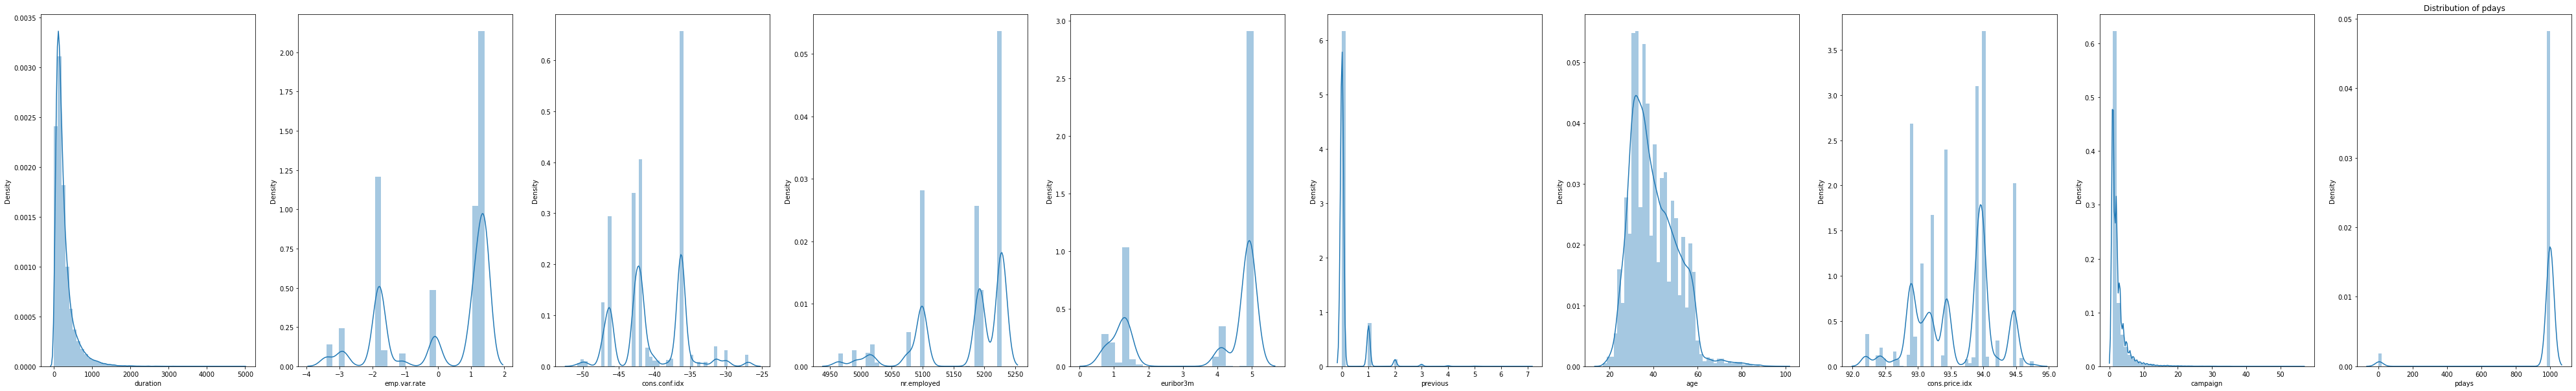

In [ ]:
#類別型屬性
def return_categorical(df):
  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'object']
  return categorical_columns

print("類別型屬性:",return_categorical(df))
#數值型屬性
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))
print("數值型屬性:",return_numerical(df))

#數值型屬性作圖
def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))
  for i,numeric_column_name in enumerate(return_numerical(df)):
    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');

check_normal(df)


<a id= "3"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data PreProcessing And Visualizations</p>

> **None of the features are following a normal distribution**

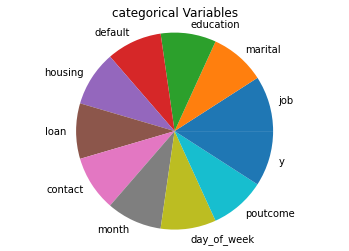

In [ ]:
#繪製類別屬性圓餅圖
xlabel = return_categorical(df)
ratings = [50,50,50,50,50,50,50,50,50,50,50]

plt.pie(ratings,labels=xlabel)
plt.title("categorical Variables")
plt.axis("equal") #equal是正圓
plt.show()




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Plots For Categorical Variables</p>

In [ ]:
# 類別型屬性作圖
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='lightblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **Class imbalance observed for target variable**

視覺化

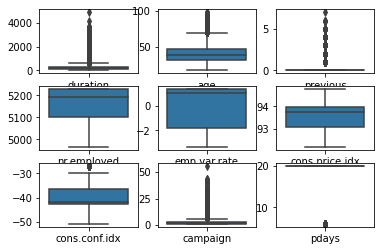

In [ ]:
#繪製箱型圖
fig,axes=plt.subplots(8,6)
plt.subplot(3,3,1)
sns.boxplot(data=df[['duration']])
plt.subplot(3,3,2)
sns.boxplot(data=df[['age']])
plt.subplot(3,3,3)
sns.boxplot(data=df[['previous']])
plt.subplot(3,3,4)
sns.boxplot(data=df[['nr.employed']])
plt.subplot(3,3,5)
sns.boxplot(data=df[['emp.var.rate']])
plt.subplot(3,3,6)
sns.boxplot(data=df[['cons.price.idx']])
plt.subplot(3,3,7)
sns.boxplot(data=df[['cons.conf.idx']])
plt.subplot(3,3,8)
sns.boxplot(data=df[['campaign']])
plt.subplot(3,3,9)
sns.boxplot(data=df[['pdays']])

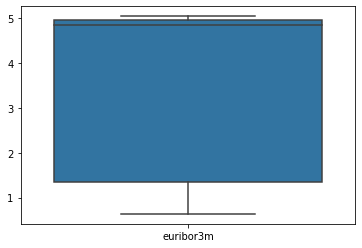

In [ ]:
#繪製箱型圖
sns.boxplot(data=df[['euribor3m']])

['day_of_week_wed', 'education_university.degree', 'month_may', 'job', 'poutcome', 'day_of_week_tue', 'education_basic.9y', 'emp.var.rate', 'day_of_week_mon', 'month_aug', 'previous', 'marital_married', 'pdays', 'marital_single', 'month_mar', 'education_high.school', 'duration', 'education_basic.6y', 'month_nov', 'day_of_week_thu', 'marital_unknown', 'housing', 'month_oct', 'education_illiterate', 'education_unknown', 'loan', 'month_sep', 'cons.conf.idx', 'default', 'contact_telephone', 'education_professional.course', 'month_jun', 'month_dec', 'nr.employed', 'month_jul', 'euribor3m', 'age', 'cons.price.idx', 'campaign', 'y']


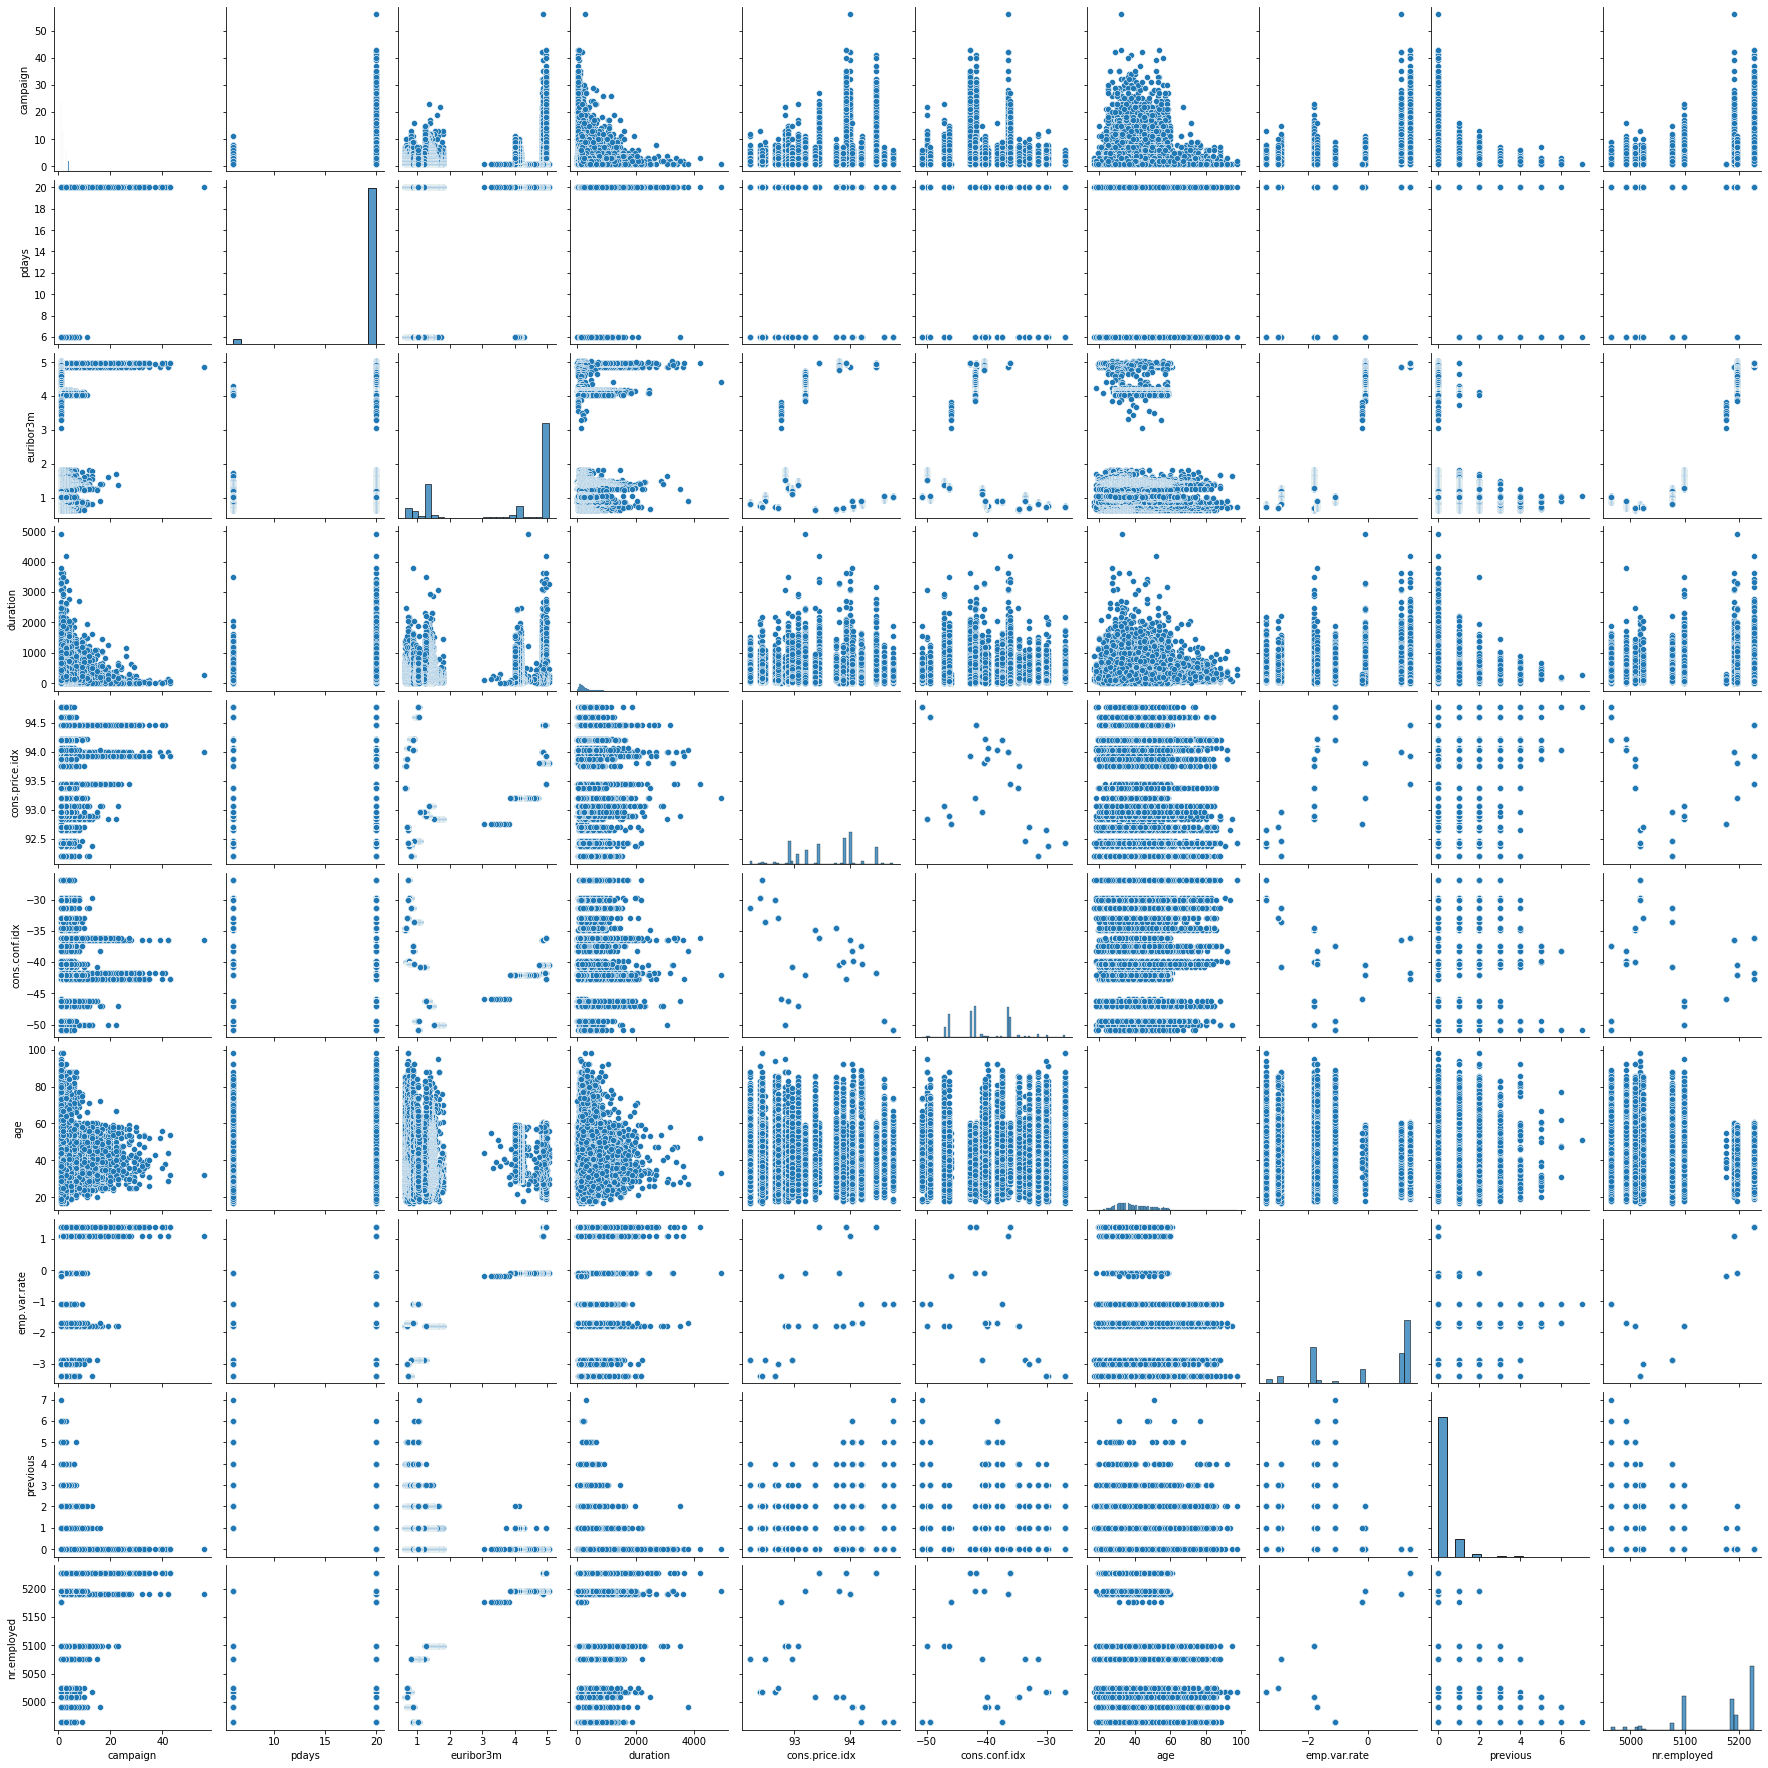

In [ ]:
#繪製直方圖與散佈圖矩陣
numeric_column_name=return_numerical(df)
print(numeric_column_name)
sns.pairplot(df[['campaign', 'pdays', 'euribor3m', 'duration', 'cons.price.idx', 'cons.conf.idx', 'age', 'emp.var.rate', 'previous', 'nr.employed']])

In [ ]:
#各屬性的基本統計資料

for i,numeric_column_name in enumerate(return_numerical(df)):
  print(numeric_column_name,":")
  print("max:",df[numeric_column_name].max())
  print("min:",df[numeric_column_name].min())
  print("mean:",df[numeric_column_name].mean())
  print("median:",df[numeric_column_name].median())
  print("Q1:",df[numeric_column_name].quantile(0.25),". Q3:",df[numeric_column_name].quantile(0.75))
  print()

day_of_week_wed :
max: 1
min: 0
mean: 0.1974700140824552
median: 0.0
Q1: 0.0 . Q3: 0.0

education_university.degree :
max: 1
min: 0
mean: 0.29544019812557665
median: 0.0
Q1: 0.0 . Q3: 1.0

month_may :
max: 1
min: 0
mean: 0.3342883504103336
median: 0.0
Q1: 0.0 . Q3: 1.0

job :
max: 15
min: -1
mean: 6.157796338561647
median: 6.0
Q1: 6.0 . Q3: 8.0

poutcome :
max: 0
min: -1
mean: -0.8967610353032583
median: -1.0
Q1: -1.0 . Q3: -1.0

day_of_week_tue :
max: 1
min: 0
mean: 0.1964016898946244
median: 0.0
Q1: 0.0 . Q3: 0.0

education_basic.9y :
max: 1
min: 0
mean: 0.14677317535084738
median: 0.0
Q1: 0.0 . Q3: 0.0

emp.var.rate :
max: 1.4
min: -3.4
mean: 0.08182877676946766
median: 1.1
Q1: -1.8 . Q3: 1.4

day_of_week_mon :
max: 1
min: 0
mean: 0.20672073034526295
median: 0.0
Q1: 0.0 . Q3: 0.0

month_aug :
max: 1
min: 0
mean: 0.14997814791433983
median: 0.0
Q1: 0.0 . Q3: 0.0

previous :
max: 7
min: 0
mean: 0.17297139804788034
median: 0.0
Q1: 0.0 . Q3: 0.0

marital_married :
max: 1
min: 0
mean: 0.




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Highly Correlated Columns</p>

In [ ]:
corr = df.corr(method="pearson")
# corr
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,job,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


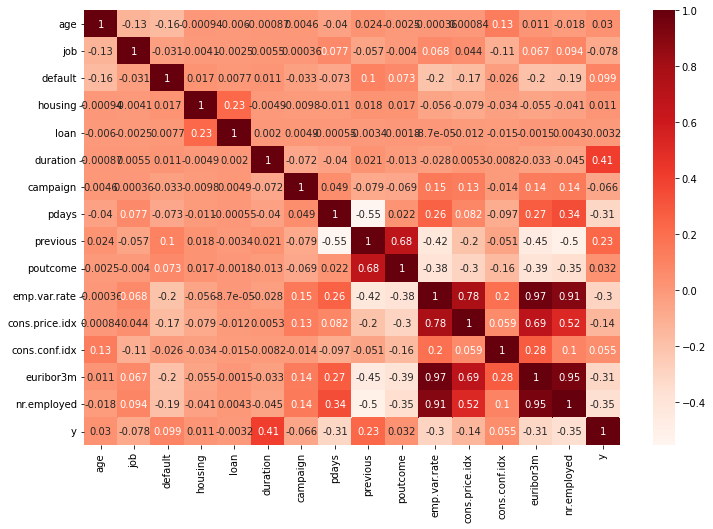

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds", annot = True)


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modifying The Columns: Assigning Weight On the Basis Of Importance</p>

In [ ]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))



In [ ]:
#異常值處理
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

:

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Dropping Columns Which I Feel Won't Affect The Predictions</p>

In [ ]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">One Hot Encoding Remaining Categorical Features</p>

In [ ]:
df  = pd.get_dummies(df, drop_first = True)



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Train-Test Split</p>

In [ ]:
x = df.drop("y", axis=1)
y = df['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


<a id ="5"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Balancing The Data Using Smote</p>

In [ ]:

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 32948
Resampled dataset shape 58484


In [ ]:
(x_train.shape[1])

39

<a id ="6"></a>


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling And Optimizing The Models</p>


In [ ]:
#knn model
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )

    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With KNN</p>

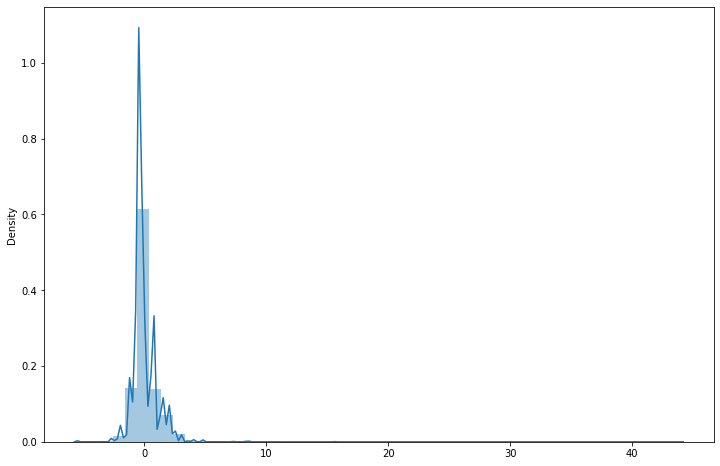

In [ ]:
# Standardization 平均&變異數標準化
s = StandardScaler()
X_train = s.fit_transform(x_train)

plt.figure(figsize=(12,8))
sns.distplot(X_train)

In [ ]:
#異常值處理(過濾掉正負3個標準差以外的數據)
outlier = X_train.copy()
mean_ = outlier.mean()
std_ = outlier.std()  #1
top = mean_ + 3 * std_
bottom = mean_ - 3*std_
outlier = (lambda x : x>top or x <bottom)
X_train=outlier

Train accuracy is: 0.5651289241501949
Test accuracy is: 0.894027676620539

F score is: 0.2388840453356582
Precision is: 0.6431924882629108
Recall is: 0.14668094218415417

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7304
           1       0.64      0.15      0.24       934

    accuracy                           0.89      8238
   macro avg       0.77      0.57      0.59      8238
weighted avg       0.87      0.89      0.86      8238



[[7228   76]
 [ 797  137]]
目前記憶體使用量為 11.447601MB; 峰值達 2196.990835MB
花費時間: 49.66505289077759


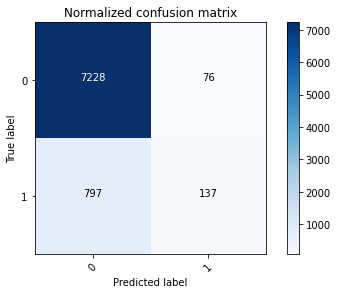

In [ ]:
tracemalloc.start() #記憶體使用量開始記錄
start = time.time()#開始記錄花費時間

knn = KNeighborsClassifier(n_neighbors = 20,metric='euclidean')
knn.fit( s.fit_transform(x_train), y_train)
classifier(knn, s.fit_transform(x_smote),s.transform(x_test), y_smote,y_test)

end = time.time()
current, peak = tracemalloc.get_traced_memory() 
print(f"目前記憶體使用量為 {current / 10**6}MB; 峰值達 {peak / 10**6}MB") 
tracemalloc.stop() #記憶體使用量結束記錄
print("花費時間:",end-start)


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Tuning The Hyperparameterrs Of KNN</p>

In [ ]:

error_rate = []
for i in range(1,20):
  tracemalloc.start() #記憶體使用量開始記錄
  start = time.time()#開始記錄花費時間
  knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  knn.fit( s.fit_transform(x_train), y_train)
  pred_i = knn.predict(s.transform(x_test))
  error_rate.append(np.mean(pred_i != y_test))
  print("k=",i)
  classifier(knn, s.fit_transform(x_smote),s.transform(x_test),y_smote,y_test)
  print()
  end = time.time()
  current, peak = tracemalloc.get_traced_memory() 
  print(f"目前記憶體使用量為 {current / 10**6}MB; 峰值達 {peak / 10**6}MB") 
  tracemalloc.stop() #記憶體使用量結束記錄
  print("花費時間:",end-start)


acc = []
for i in range(1,20):
  neigh = KNeighborsClassifier(n_neighbors = i,metric='euclidean').fit(s.fit_transform(x_train), y_train)
  yhat = neigh.predict(s.transform(x_test))
  acc.append(metrics.accuracy_score(y_test, yhat))
    

k= 1
Train accuracy is: 0.6813487449558854
Test accuracy is: 0.8833454722019908

F score is: 0.3787976729153199
Precision is: 0.47797716150081565
Recall is: 0.31370449678800855

目前記憶體使用量為 10.661569MB; 峰值達 2179.631872MB
花費時間: 30.47219228744507
k= 2
Train accuracy is: 0.5750119690855618
Test accuracy is: 0.889900461277009

F score is: 0.22279348757497858
Precision is: 0.5579399141630901
Recall is: 0.139186295503212

目前記憶體使用量為 10.667778MB; 峰值達 2180.679337MB
花費時間: 35.01561641693115
k= 3
Train accuracy is: 0.6313692633882771
Test accuracy is: 0.890507404709881

F score is: 0.34064327485380114
Precision is: 0.5368663594470046
Recall is: 0.2494646680942184

目前記憶體使用量為 10.636843MB; 峰值達 2181.549827MB
花費時間: 41.033923625946045
k= 4
Train accuracy is: 0.575610423363655
Test accuracy is: 0.8922068463219228

F score is: 0.24489795918367344
Precision is: 0.5950413223140496
Recall is: 0.15417558886509636

目前記憶體使用量為 10.657205MB; 峰值達 2182.450639MB
花費時間: 71.2683355808258
k= 5
Train accuracy is: 0.61151768

Minimum error:- 0.10148094197620781 at K = 18


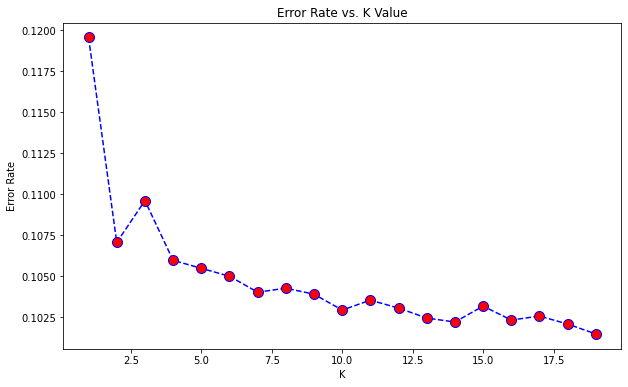

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Maximum accuracy:- 0.8985190580237922 at K = 18


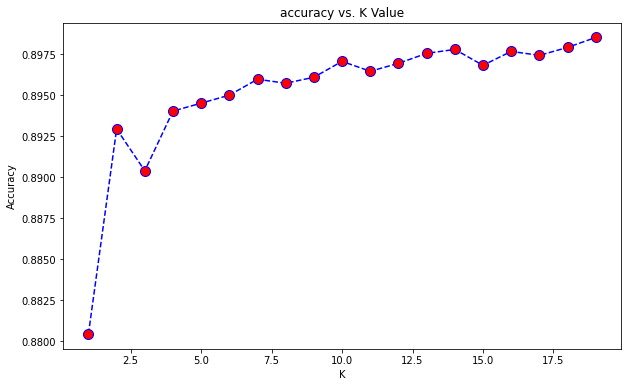

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With The Value Of K which Gave Least Error</p>

In [ ]:
#knn model
import itertools
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print()
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
def classifier(clf, x_train,x_test,y_train,y_test):
  y_test_pred = clf.predict(x_test)
  y_train_pred = clf.predict(x_train)

  accuracy_test = accuracy_score(y_test,y_test_pred)
  accuracy_train =  accuracy_score(y_train,y_train_pred)
  
  print('Train accuracy is:',accuracy_train )
  print('Test accuracy is:',accuracy_test )

  # Fscore, precision and recall on test data
  f1 = f1_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred) 
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  print()
  print(metrics.classification_report(y_test,y_test_pred))
  print()
  attack_types = ['0','1']
  plot_confusion_matrix(metrics.confusion_matrix(y_test,y_test_pred), classes=attack_types, normalize=False, title='Normalized confusion matrix')
  


  


Train accuracy is: 0.9249880309144382
Test accuracy is: 0.8750910415149308

F score is: 0.46378322042730596
Precision is: 0.4517766497461929
Recall is: 0.47644539614561027

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7304
           1       0.45      0.48      0.46       934

    accuracy                           0.88      8238
   macro avg       0.69      0.70      0.70      8238
weighted avg       0.88      0.88      0.88      8238



[[6764  540]
 [ 489  445]]


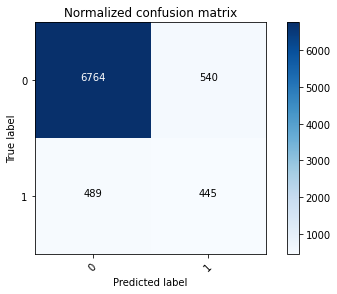

In [ ]:
#最終模型
knn = KNeighborsClassifier(n_neighbors = 18,metric='euclidean')
knn.fit( s.fit_transform(x_smote), y_smote)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test),y_smote,y_test)